# Aglomerative/Hierarchical_Clustering

### (Unsupervised learning)

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import scipy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import image as mpimg
from sklearn.preprocessing import OrdinalEncoder

In [3]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

### Steps to cluster

1. Fill NaNs.
2. Encoding categorical variables.
3. Standarize or Scaling the variables.
4. We can do a dimension reduccion. (optional)
5. Apply the clusterization method.
6. Choose the optimal number of cluster using Elbow Method or Sillhoute score.

# Aglomerative/Hierarchical Clusterings: Explanation

When we have an order of 10k data points we can use this type of algorithm, but when we have much more point we have to use other algorithms like K-means among others.

### Step 1:

We have $n$ points. You build as many clusters as points.

### Step 2:

You build a cluster with the $2$ closest points. Then we have $ n - 1 $ cluster.

### Step 3:

We join the two closest clusters.

### Step 4:

Iterate on the step 3, till we have only one cluster.

### Distance Metric

As you can see is very important the metric of distance between two cluster. We can measure this distance in many ways, we going to present the principals.

Let be the clusters $ r $ and $ s $. Consider $ C_r $ and $ C_s $ the sets with all the point belong to the cluster. 

**Minimal Distance:**

$ d(s, r) = min_{a \in C_r, b \in C_s} d(a, b) $

**Maximal Distance:**

$ d(s, r) = max_{a \in C_r, b \in C_s} d(a, b) $

**Average Distance:**

$ d(s, r) = \cfrac{1}{n_s \cdot n_r} \sum_{a \in C_r, b \in C_s} d(a, b) $

**Centroid Distance:**

Let be $(x_s)$ and $(x_r)$ the centroids of the clusters. 

$ d(s, r) = d(x_r, x_s) $

### Example

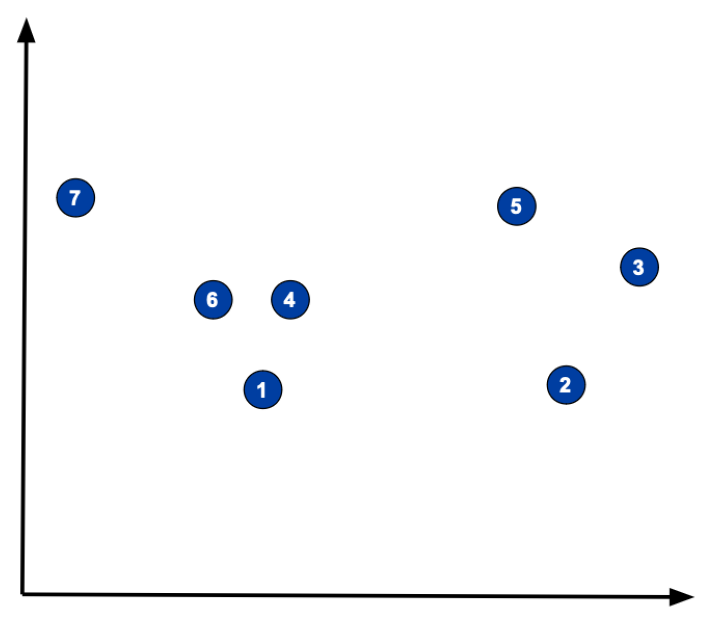

In [4]:
display_img('1.png', 9, 9)

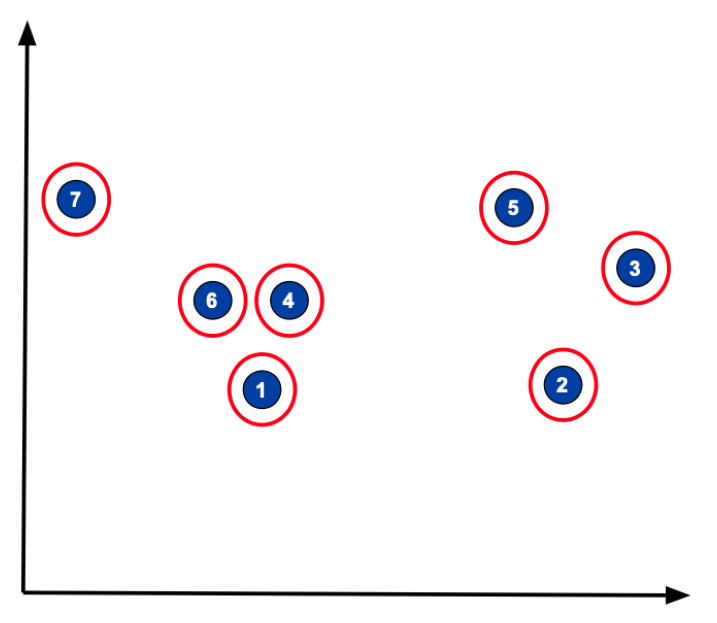

In [5]:
display_img('2.png', 9, 9)

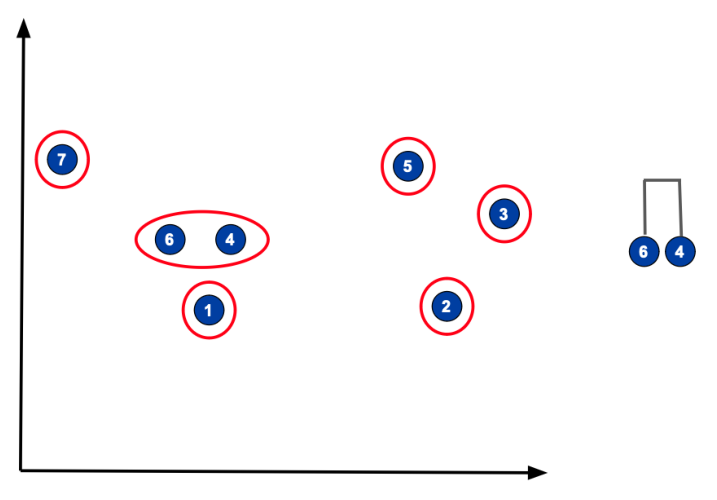

In [6]:
display_img('3.png', 9, 9)

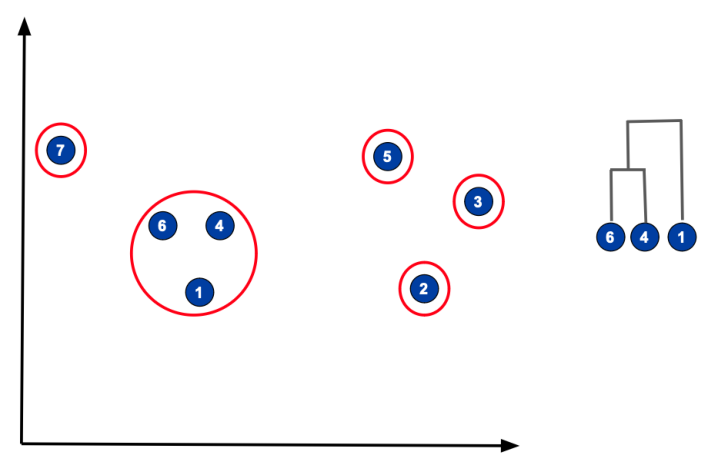

In [7]:
display_img('4.png', 9, 9)

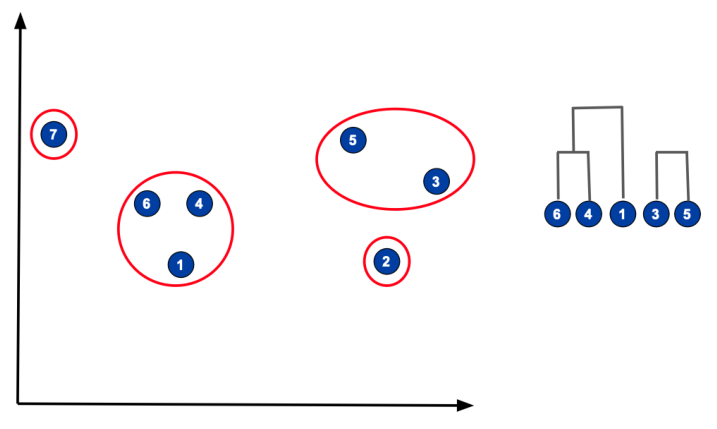

In [8]:
display_img('5.png', 9, 9)

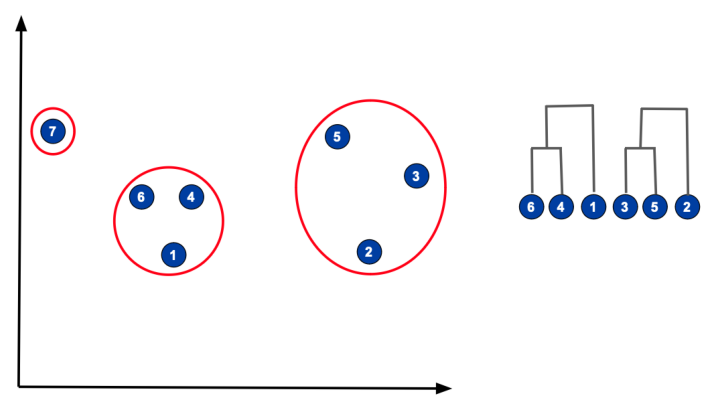

In [9]:
display_img('6.png', 9, 9)

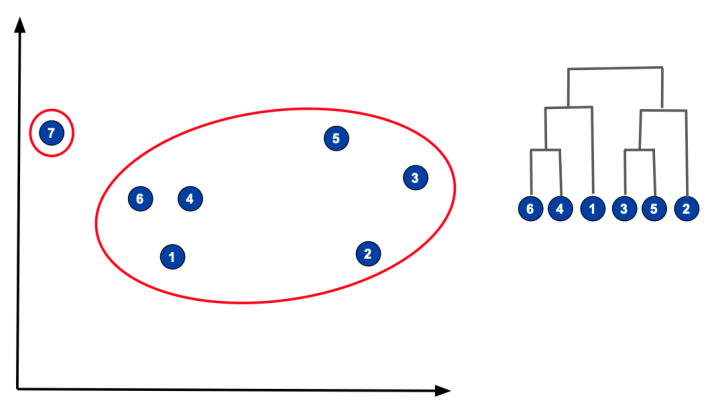

In [10]:
display_img('7.png', 9, 9)

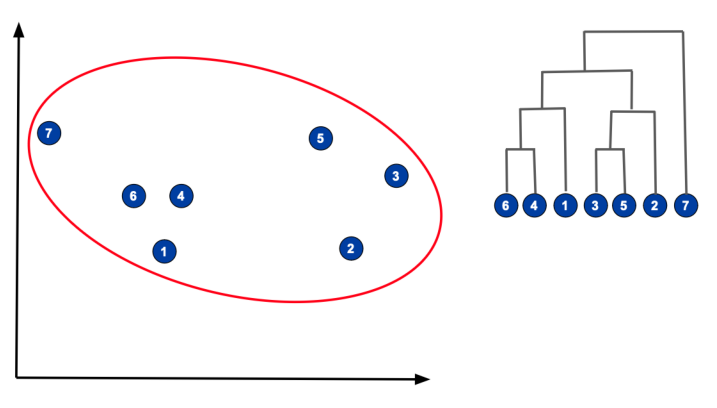

In [11]:
display_img('8.png', 9, 9)

### Dendrogram

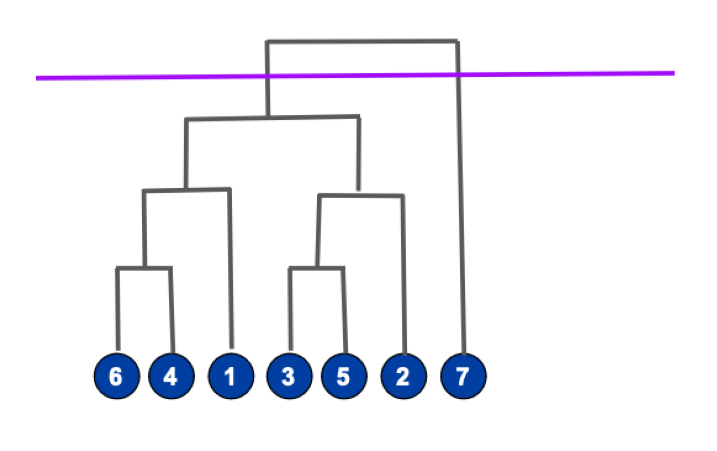

In [12]:
display_img('9.png', 9, 9)

We have 2 clusters.

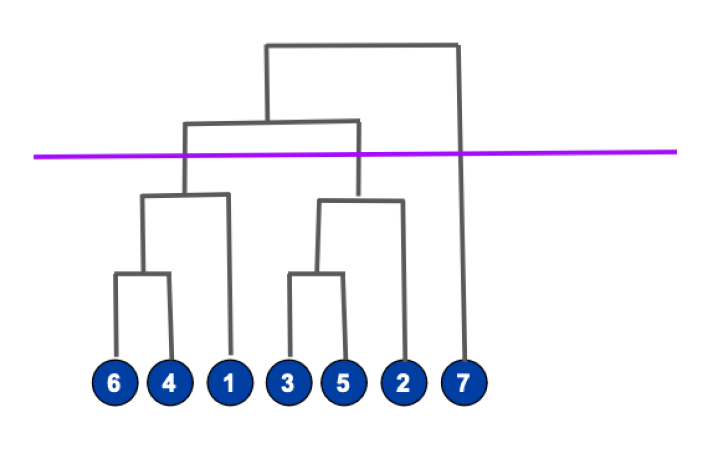

In [13]:
display_img('10.png', 9, 9)

We have 3 clusters.

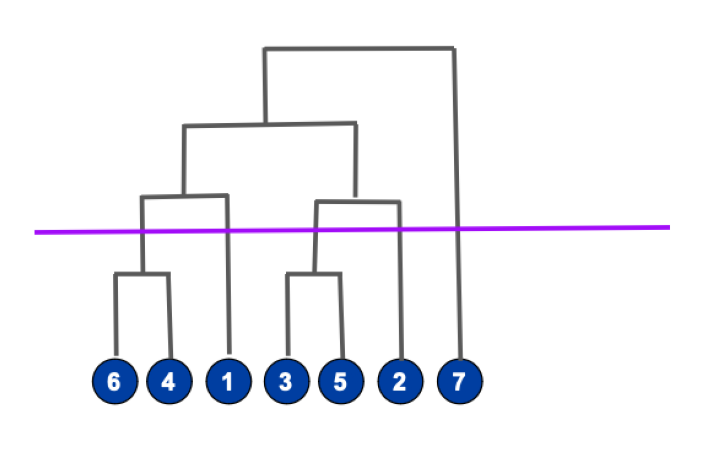

In [14]:
display_img('11.png', 9, 9)

We have 5 clusters.

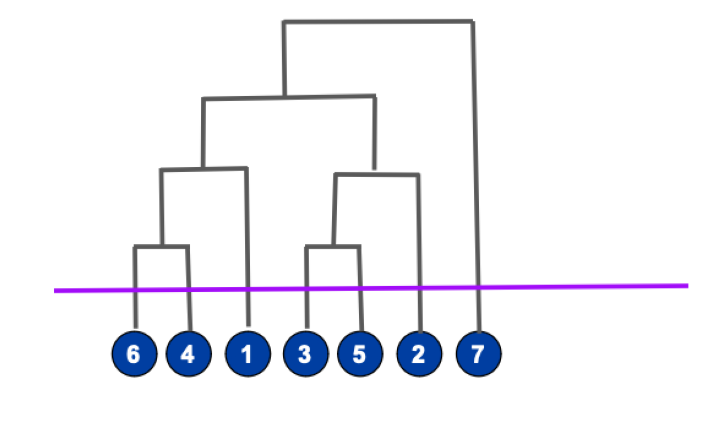

In [15]:
display_img('12.png', 9, 9)

We have 7 clusters.

In [16]:
start = time.time()

# 1. Preprocessing

### i. Read Dataframe

In [17]:
df = pd.read_csv('marketing_campaign.csv', delimiter = '\t')

In [18]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [19]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

### ii. Compute/Encoding features

**Age**

In [20]:
now = datetime.today().year
df['Age'] = (now - df['Year_Birth'])

In [21]:
df = df.drop(columns = ['ID', 'Year_Birth'])

**b. Education**

In [22]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [23]:
edu_values = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']

In [24]:
ord_enc = OrdinalEncoder(categories = [edu_values])

In [25]:
ord_enc = ord_enc.fit(df[['Education']])

In [26]:
df['Education'] = pd.DataFrame(ord_enc.transform(df[['Education']]))[0]

In [27]:
df['Education'].value_counts()

2.0    1127
4.0     486
3.0     370
1.0     203
0.0      54
Name: Education, dtype: int64

**c. Marital Status**

In [28]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [29]:
df = df.replace({'Marital_Status': {'Single': 'Other', 'Divorced': 'Other', 'Widow': 'Other', 'Alone': 'Other', 'Absurd': 'Other', 'YOLO': 'Other'}})

In [30]:
df['Marital_Status'].value_counts()

Married     864
Other       796
Together    580
Name: Marital_Status, dtype: int64

In [31]:
mari_values = ['Other', 'Together', 'Married']

In [32]:
ord_enc = OrdinalEncoder(categories = [mari_values])

In [33]:
ord_enc = ord_enc.fit(df[['Marital_Status']])

In [34]:
df['Marital_Status'] = pd.DataFrame(ord_enc.transform(df[['Marital_Status']]))[0]

In [35]:
df['Marital_Status'].value_counts()

2.0    864
0.0    796
1.0    580
Name: Marital_Status, dtype: int64

**d. Dt Costumer**

In [36]:
now = datetime.today()

In [37]:
df['Dt_Customer'] = (now - pd.to_datetime(df['Dt_Customer'])).dt.days/365

### iii. Types Variables

In [38]:
cols_df = list(df.columns)

In [39]:
df[cols_df] = df[cols_df].astype('float')

### iv. Normalize

In [40]:
mean_df = df.mean()
std_df = df.std()

In [41]:
df = (df - mean_df)/std_df

In [42]:
del_cols = list(std_df[std_df == 0].keys())

In [43]:
del_cols

['Z_CostContact', 'Z_Revenue']

In [44]:
df = df.drop(columns = del_cols)

### v. Drop NaNs

In [45]:
df = df.dropna()

# 2. Clustering

In [46]:
from sklearn.cluster import AgglomerativeClustering

In [47]:
from sklearn.metrics import silhouette_score

In [48]:
range_n_clusters = [(i + 6) for i in range(100)]

sil_sco = []

for n_clusters in range_n_clusters:

    model = AgglomerativeClustering(n_clusters = n_clusters).fit(df)

    sil_sco.append(silhouette_score(df, model.labels_, metric = 'euclidean'))

range_n_clusters = np.array(range_n_clusters)

sil_sco = np.array(sil_sco)

### a. Silhouette Coefficient

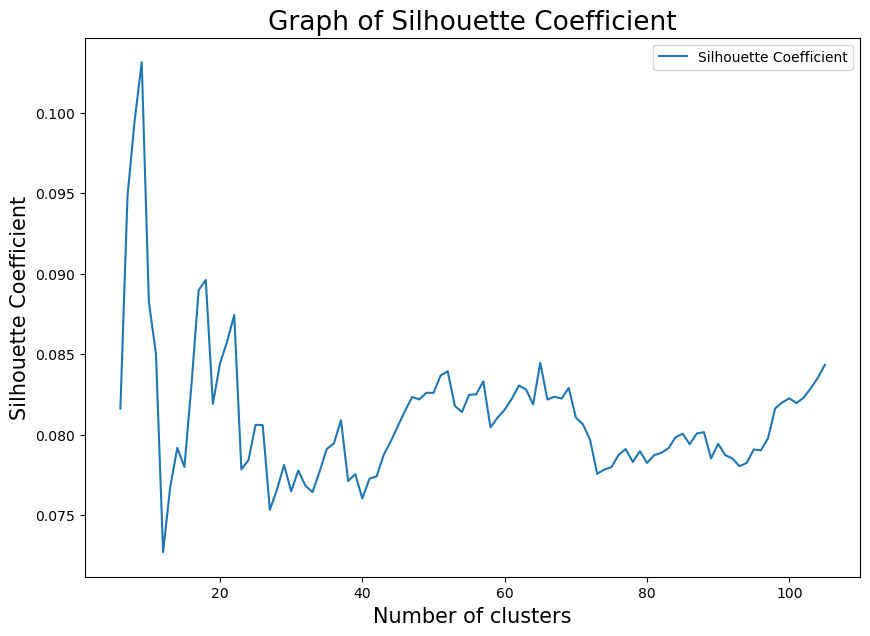

In [49]:
plt.figure(figsize = (10, 7))

plt.title('Graph of Silhouette Coefficient', fontsize = 19)

plt.plot(range_n_clusters, sil_sco, label = 'Silhouette Coefficient')

plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('Silhouette Coefficient', fontsize = 15)

plt.legend()

plt.show()

In [50]:
K_opt_sil = range_n_clusters[sil_sco == sil_sco.max()][0]

In [51]:
K_opt_sil

9

In [52]:
round(sil_sco.max(), 4)

0.1031

**Comments:** The optimal is $K = 9$.

### c. Definitive model

In [53]:
model = AgglomerativeClustering(n_clusters = K_opt_sil).fit(df)

In [54]:
df['cluster'] = pd.Series(model.labels_)

In [55]:
df['cluster'].value_counts()

0.0    688
2.0    560
5.0    475
1.0    138
6.0    123
3.0     81
8.0     77
4.0     30
7.0     21
Name: cluster, dtype: int64

### Time of execution

In [56]:
end = time.time()

In [57]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 0 minutes and 10 seconds.
